In [2]:
import sys, os, time, shutil, random
from pathlib import Path
if '_cwd' not in locals():
    _cwd = os.getcwd()
    os.chdir(Path(_cwd)/'..')

%load_ext autoreload
%autoreload 2
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib.patches as mpatches
from tqdm.notebook import tqdm
from scipy import misc, signal

from sklearn.neighbors import NearestNeighbors
import networkx as nx
import cv2
import random
import ctypes
from scipy.signal import convolve2d, correlate2d
import ipywidgets as widgets
from IPython.display import display, clear_output
from collections import Counter
import io

import scipy.sparse as sp
from scipy.optimize import linear_sum_assignment

import omnifig as fig
from omnibelt import load_yaml, save_yaml, multi_index

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.segmentation import *
from skimage.segmentation import watershed, expand_labels
from skimage.morphology import closing, square, dilation
from skimage.color import label2rgb
from PIL import Image
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
fig.initialize()
from src.v3 import *

In [3]:
root = Path(r'C:\Users\anwan\OneDrive\Khan\projects\digi-diplo\extra\v3')

In [4]:
_imgsize = (6,6)
def showx(im, cover=None):
    plt.figure(figsize=_imgsize)
    try:
        plt.imshow(im.astype(int))
        if cover is not None:
            plt.imshow(cover%1000, alpha=0., zorder=10)
    except ValueError:
        plt.imshow(im)
    
    plt.axis('off')
    plt.subplots_adjust(0,0,1,1)

In [ ]:
def showx(im, cover=None):
    plt.figure(figsize=_imgsize)
    try:
        plt.imshow(im.astype(int))
        if cover is not None:
            plt.imshow(cover%1000, alpha=0., zorder=10)
    except ValueError:
        plt.imshow(im)
    
    plt.axis('off')
    plt.subplots_adjust(0,0,1,1)

<IPython.core.display.Javascript object>


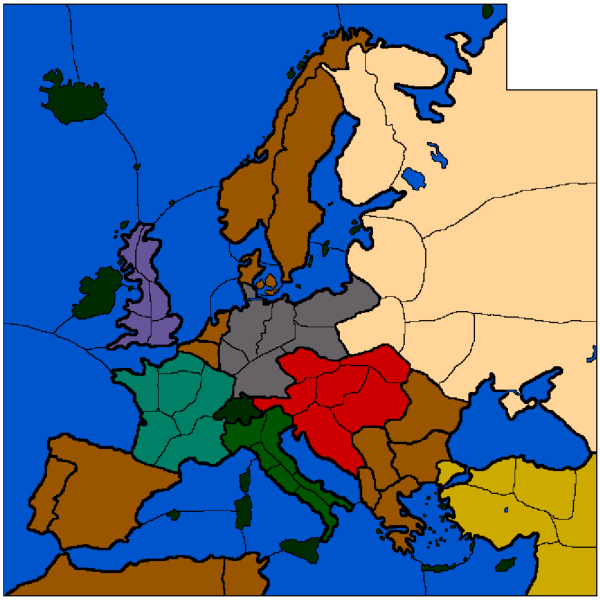

In [5]:
color_path = root / 'borders.png'

im = Image.open(color_path).convert('RGBA')
im = np.asarray(im)
rgb = im[...,:3]
rgb = rgb[::2,::2]
# show(im)
showx(rgb)

In [81]:
im = Image.open(color_path).convert('RGBA')
im = np.asarray(im)
rgb = im[...,:3]
rgb = rgb[::2,::2]

In [89]:
from matplotlib.figure import figaspect
scale = 1.

<IPython.core.display.Javascript object>


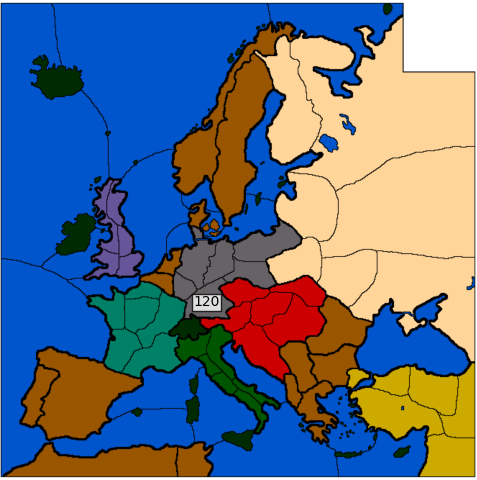

In [109]:
H, W, _ = im.shape
aw, ah = figaspect(H / W)
aw, ah = scale * aw, scale * ah
figsize = aw, ah

plt.figure(figsize=figsize)
plt.imshow(im);
plt.axis('off')
plt.subplots_adjust(0,0,1,1);

In [110]:
t = plt.text(860,1260,'120', va='center', ha='center',
#              transform=ax.transAxes,
             bbox=dict(facecolor='1', edgecolor='0', alpha=0.8, pad=1.)
             )
# t.set_bbox(dict(facecolor='1', alpha=0.8, edgecolor='0'), pad=-1);

In [112]:
root = r'C:\Users\anwan\OneDrive\Khan\projects\digi-diplo\extra\v3\tests'
root = Path(root)
path = root / 'regions.png'

In [115]:
regim = np.array(Image.open(path))
regim.shape

(2001, 1986)

<IPython.core.display.Javascript object>


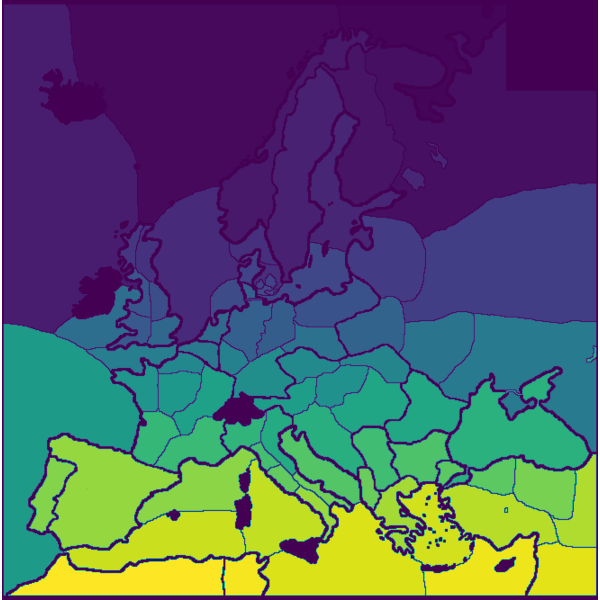

In [116]:
showx(regim)

In [80]:
border_color = '#000000'
bcolor = hex_to_rgb(border_color)
bcolor

[0, 0, 0]

In [6]:
border_color = '#000000'
bcolor = hex_to_rgb(border_color) if isinstance(border_color, str) else border_color
bcolor = np.array(bcolor).reshape(1,1,-1)

border = np.abs(rgb - bcolor).sum(-1) == 0
lbls = label(fill_diagonals(border))[1::3, 1::3]

In [7]:
g = extract_neighbors(lbls, pbar=tqdm)

  0%|          | 0/166 [00:00<?, ?it/s]

In [8]:
tmap = generate_tiles(rgb, g=g, 
#                       path=(root/'tiles.png'), 
                      pbar=tqdm)
tmap.shape

(1001, 993, 3)

<IPython.core.display.Javascript object>


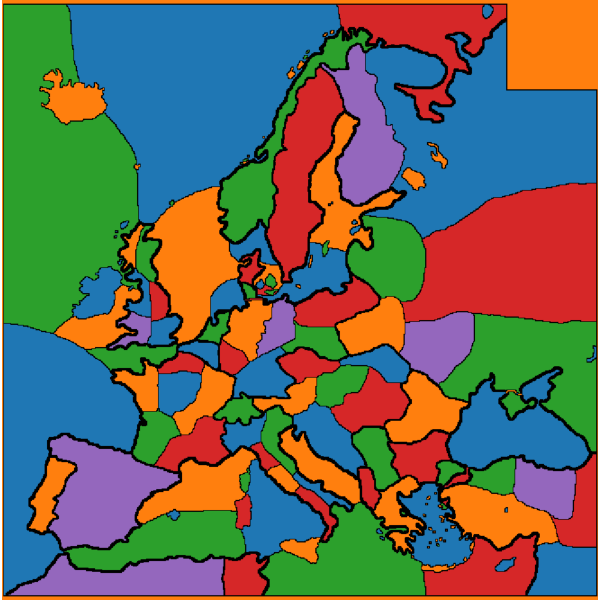

In [9]:
showx(tmap)

In [10]:
cats_path = root / 'cats.png'

cat_im = Image.open(cats_path).convert('RGBA')
cat_im = np.asarray(cat_im)
crgb = cat_im[...,:3]
crgb = crgb[::2,::2]
crgb.shape

(1001, 993, 3)

In [11]:
ccs = set(map(tuple,crgb.reshape(-1, 3).tolist()))
ccs.discard((0,0,0))
ccs

{(0, 255, 33), (0, 255, 255)}

<IPython.core.display.Javascript object>


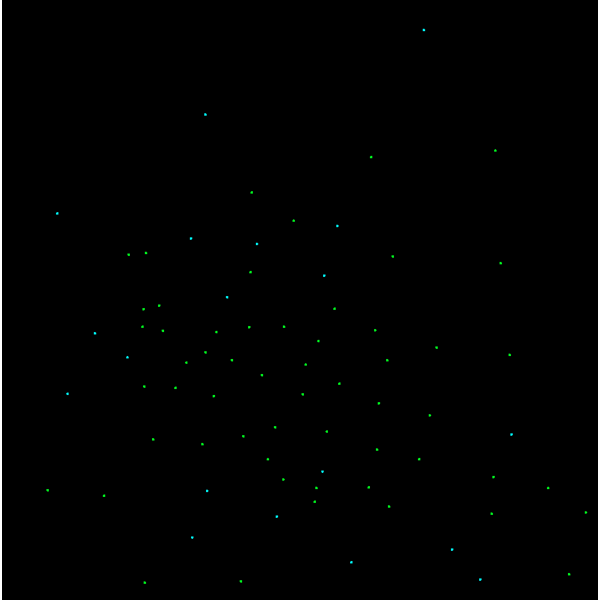

In [12]:
showx(crgb)

<IPython.core.display.Javascript object>


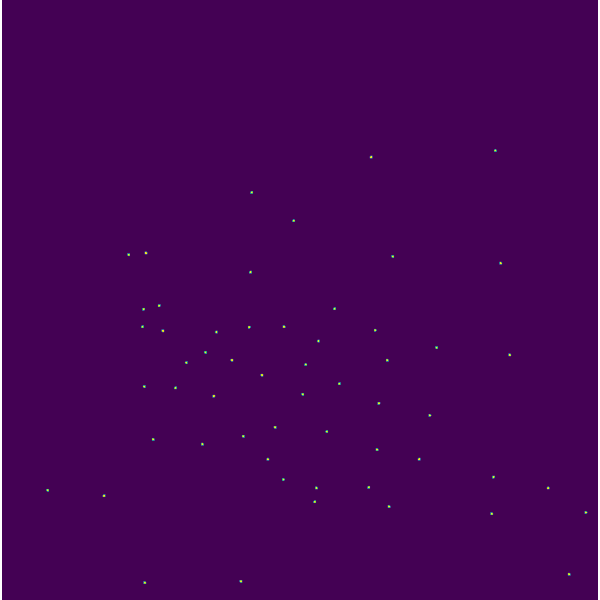

In [18]:
clbl = label(crgb.sum(-1))
dinfo = regionprops(clbl)
dinfo.insert(0,[])
color = (0, 255, 33)
c = np.array(color).reshape(1,1,-1)
sel = (crgb - c).sum(-1) == 0
showx(sel)

In [20]:
dinfo[3].centroid

(250.71428571428572, 821.5)

In [16]:
set(clbl[sel].tolist())

{3,
 4,
 5,
 7,
 11,
 12,
 13,
 14,
 15,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 42,
 43,
 44,
 45,
 46,
 47,
 49,
 50,
 51,
 52,
 53,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 64,
 65,
 66,
 67,
 72,
 74,
 75}

In [37]:
splits = [12, 15, 20, 25]
names = ['orange', 'yellow', 'green', 'blue']
N = sum(splits)
N

72

In [25]:
nums = np.array([2,3,4,5])
wts = np.array([0.2, 0.3, 0.4, 0.1])

In [28]:
N / nums * wts

array([7.2 , 7.2 , 7.2 , 1.44])

In [40]:
import random

In [39]:
res = [names[i] for i,n in enumerate(splits) for _ in range(n)]

In [ ]:
groups = []
while True:
    
    
    
    pass

In [73]:
nums = np.array(random.choices([2,3,4,5], weights=[0.2, 0.4, 0.3, 0.1], k=100))

In [74]:
tots = nums[np.cumsum(nums)<72]
len(tots)

24

In [75]:
cards = [random.choices(names, weights=splits, k=n) for n in tots]
cards

[['blue', 'yellow', 'yellow', 'blue'],
 ['green', 'yellow'],
 ['yellow', 'orange', 'green'],
 ['green', 'yellow', 'green'],
 ['blue', 'blue', 'blue'],
 ['orange', 'blue', 'orange', 'green', 'green'],
 ['yellow', 'yellow'],
 ['green', 'blue', 'blue'],
 ['green', 'green'],
 ['blue', 'yellow'],
 ['blue', 'orange', 'blue'],
 ['yellow', 'green', 'blue', 'green'],
 ['blue', 'blue', 'blue'],
 ['blue', 'yellow', 'yellow'],
 ['orange', 'yellow', 'green'],
 ['blue', 'green', 'blue'],
 ['blue', 'orange', 'orange'],
 ['blue', 'blue'],
 ['orange', 'yellow', 'green'],
 ['green', 'green', 'green', 'blue'],
 ['blue', 'orange', 'yellow', 'blue'],
 ['blue', 'orange'],
 ['green', 'blue'],
 ['yellow', 'green']]

In [78]:
Counter([x for xs in cards for x in xs])

Counter({'blue': 26, 'yellow': 15, 'green': 19, 'orange': 10})

In [76]:
north = {'Beijing': 5, 'Tianjin': 4, 'Shenyang': 3, 'Baotou': 1, 'Taiyuan': 1, 'Tangshan': 1, 'Changchun': 1}
central = {'Shanghai': 5, 'Nanjing': 4, 'Hangzhou': 3, 'Zhengzhou': 2, 'Qingdao': 1, 'Shijiazhuang': 1, 'Jinan': 1}
south = {'Hong Kong': 5, 'Guangzhou': 4, 'Wuhan': 3, 'Changsha': 1, 'Nanchang': 1, 'Fuzhou': 1, 'Chaozhou': 1}
sw = {'Xi\'an': 5, 'Chongqing': 3, 'Chengdu': 3, 'Kunming': 2, 'Guiyang': 1, 'Nanning': 1, 'Haikou': 1}
regions = [north, central, south, sw]
noise = 4
regions = [{k:v+noise for k,v in r.items()} for r in regions]

In [77]:
random.choices(*zip(*regions[0].items()), k=8)

['Beijing',
 'Shenyang',
 'Tangshan',
 'Beijing',
 'Shenyang',
 'Baotou',
 'Tangshan',
 'Beijing']